In [2]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# print x,y,z of central pixel 

# Read image files
image_dir = "./2018-04-20-10-04-11/kinect/color"
files = os.listdir(image_dir)
image_extensions = ['.png']

for file in files : 
    if os.path.splitext(file)[-1].lower() in image_extensions: # why -1 : the last component of tuple
        image_path = os.path.join(image_dir,file)
        img = cv2.imread(image_path)

        height, width = img.shape[:2] # only height and width

        center_x = width//2
        center_y = width//2

        center_pixel_value = img[center_y, center_x]
        print("center pixel value : ", center_pixel_value)
        # numpy -> np.load : bakcground depth image + standing person -> outline of person
        # array1-array2 ; vectorization = dont need to do whole for loop

center pixel value :  [37 44 43]
center pixel value :  [ 95 108 106]
center pixel value :  [119 129 129]
center pixel value :  [140 148 147]
center pixel value :  [125 135 135]
center pixel value :  [126 133 132]
center pixel value :  [ 82 123 178]
center pixel value :  [118 126 125]
center pixel value :  [114 123 122]
center pixel value :  [132 140 139]
center pixel value :  [121 133 133]
center pixel value :  [134 141 139]
center pixel value :  [ 56  81 118]
center pixel value :  [124 136 134]
center pixel value :  [108 115 114]
center pixel value :  [129 135 134]
center pixel value :  [ 73 110 166]
center pixel value :  [116 126 125]
center pixel value :  [108 145 197]
center pixel value :  [103 143 197]
center pixel value :  [137 143 142]
center pixel value :  [ 66  93 133]
center pixel value :  [110 134 180]
center pixel value :  [131 138 137]
center pixel value :  [139 145 144]
center pixel value :  [124 138 135]
center pixel value :  [ 95 104 103]
center pixel value :  [24 30 29

In [4]:
data = np.load('/Users/sojeonglee/CVL_practice/2018-04-20-10-04-11/kinect/depth/1524211452432110513.npy')
print(data[:10, :10])  # 처음 10개 행과 열만 출력

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


uint16
0 11192


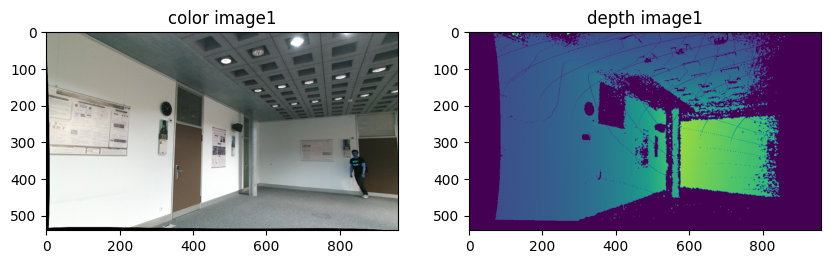

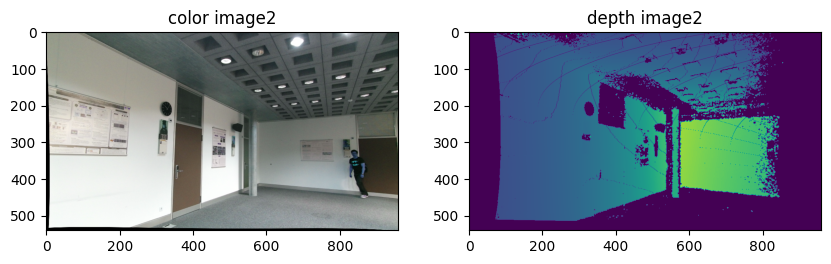

In [5]:
# display images
# color image right next to depth img
# use matplolib subplot    

#load route 
color_image1 = cv2.imread('2018-04-20-10-04-11/kinect/color/1524211452545791624.png')
color_image2 = cv2.imread('2018-04-20-10-04-11/kinect/color/1524211452606606063.png')

depth_image1 = np.load('2018-04-20-10-04-11/kinect/depth/1524211452432110513.npy')
depth_image2 = np.load('2018-04-20-10-04-11/kinect/depth/1524211452465143660.npy')

print(depth_image1.dtype)
print(np.amin(depth_image1),np.amax(depth_image2))

plt.figure(figsize=(10,7))

plt.subplot(1,2,1)
plt.imshow(color_image1)
plt.title('color image1')

plt.subplot(1,2,2)
plt.imshow(depth_image1)
plt.title('depth image1')
plt.show()

plt.figure(figsize=(10,7))

plt.subplot(1,2,1)
plt.imshow(color_image2)
plt.title('color image2')

plt.subplot(1,2,2)
plt.imshow(depth_image2)
plt.title('depth image2')
plt.show()



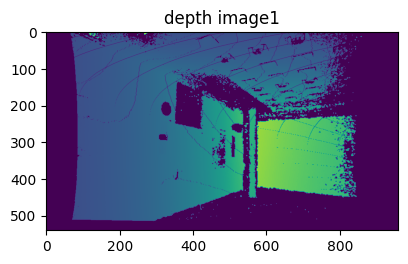

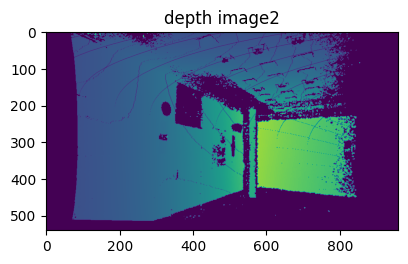

In [6]:
# numpy -> np.load : bakcground depth image + standing person -> outline of person
# array1-array2 ; vectorization = dont need to do whole for loop

# read depth image
depth_image1 = np.load('2018-04-20-10-04-11/kinect/depth/1524211452432110513.npy')
depth_image2 = np.load('2018-04-20-10-04-11/kinect/depth/1524211452465143660.npy')

plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plt.imshow(depth_image1)
plt.title('depth image1')
plt.show()

plt.figure(figsize=(10,7))
plt.subplot(1,2,2)
plt.imshow(depth_image2)
plt.title('depth image2')
plt.show()

In [7]:
# In general, figure exists more far than background, so you can choose pixels which has depth value over threshold. 
# cv2.threshold() : you can binarize depth image -> and seperate figure
# cv2.findContours() : you can find outline of figure and extract figure out of the picture.

image = cv2.imread('2018-04-20-10-04-11/kinect/color/1524211452545791624.png', cv2.IMREAD_GRAYSCALE)
cv2.imshow('.', image)

# binarize
ret, thresh = cv2.threshold(image, 127,255,cv2.THRESH_BINARY)

# contouring
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

image_with_contours = cv2.drawContours(image, contours, -1, (0,255,0), 2)

cv2.imshow('image with contours', image_with_contours)
cv2.waitKey(0)
cv2.destroyAllWindows()

11192


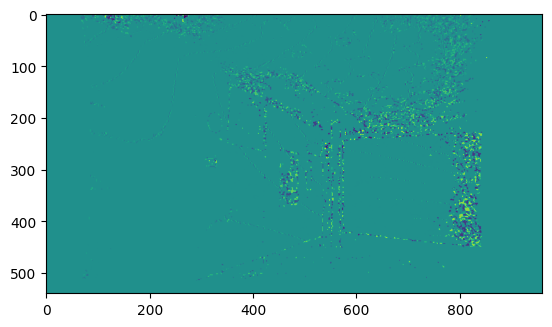

In [8]:
color_image1 = cv2.imread('2018-04-20-10-04-11/kinect/color/1524211452545791624.png')
color_image2 = cv2.imread('2018-04-20-10-04-11/kinect/color/1524211452606606063.png')

depth_image1 = np.load('2018-04-20-10-04-11/kinect/depth/1524211452432110513.npy').astype(np.int64)
depth_image2 = np.load('2018-04-20-10-04-11/kinect/depth/1524211484410027189.npy').astype(np.int64)

diff = depth_image2 - depth_image1

print(np.amax(diff))

import matplotlib.pyplot as plt
plt.imshow(diff);plt.show()

11139


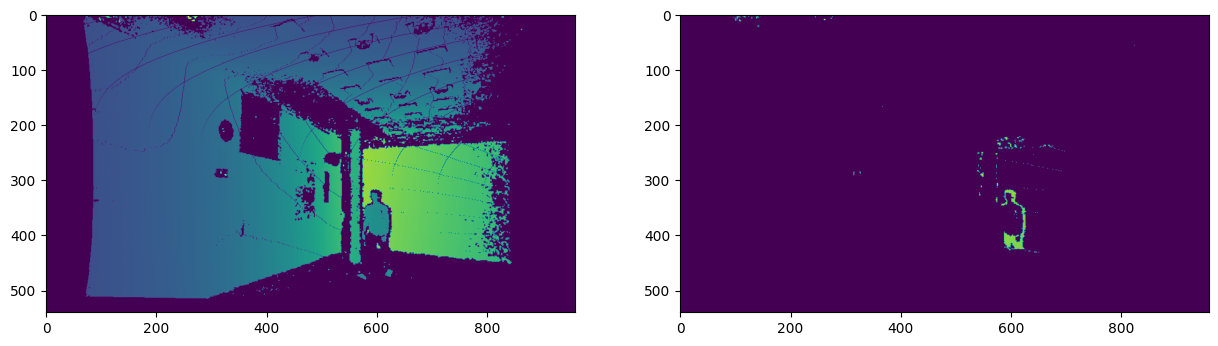

In [41]:
# how to get ouline of person?
# found two photos which have big difference especially the shape of person

# 2018-04-20-10-04-11/kinect/color/1524211455879191910.png -> 사람 없음
# 2018-04-20-10-04-11/kinect/color/1524211456141333067.png -> 사람 나타남

depth1 = np.load('2018-04-20-10-04-11/kinect/depth/1524211455737017041.npy').astype(np.int64)
depth2 = np.load('2018-04-20-10-04-11/kinect/depth/1524211456408511802.npy').astype(np.int64)

plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.imshow(depth1)

diff = depth2 - depth1
# color2[np.where(diff<1000)] *= 0
diff[np.where(diff < 8500)] = 0

print(np.amax(diff))

plt.subplot(1,2,2)
plt.imshow(diff)
plt.show()

#import matplotlib.pyplot as plt
#plt.imshow(diff);plt.show()

In [ ]:
# new hw

# get bounding box
# cv2 algo : connecting components !!!
# group the pixels -> person or noise